# Bloom filter bencmark

In [1]:
from bloom_filter import BloomFilter
from bloom_filter.tools import false_positive_rate,\
    minimal_memory_footprint
import matplotlib.pyplot as plt

## 1. Error rate:
The bloom filter guarantees a null false negative rate and a controlled false positive rate.  
Let's verify these assertions.

In [2]:
BIT_ARRAY_SIZE = 10 ** 5
NB_SALT = 20
INPUT_CARDINAL = 10 ** 4

In [3]:
bloom_filter = BloomFilter(bit_array_size=BIT_ARRAY_SIZE, 
                           nb_salt=NB_SALT)

2019-10-20 12:22:34,653 - bloom_filter.bloom_filter - INFO - Bloom filter parameters: bit-array size: 100000 number of hash functions: 20


In [4]:
for item in range(INPUT_CARDINAL):
    bloom_filter.add_item(item=item)

In [5]:
false_negative_count = 0
for item in range(INPUT_CARDINAL):
    if not bloom_filter.retrieve_item(item=item):
        false_negative_count += 1
experience_false_negative_rate = round(false_negative_count / INPUT_CARDINAL, 3) * 100

print(f'Experience false negative rate: {experience_false_negative_rate}%')

Experience false negative rate: 0.0%


In [6]:
false_positive_count = 0
for item in range(INPUT_CARDINAL, 2 * INPUT_CARDINAL):
    if bloom_filter.retrieve_item(item=item):
        false_positive_count += 1
experience_false_positive_rate = round(false_positive_count / INPUT_CARDINAL, 3) * 100

print(f'Experience false positive rate: {experience_false_positive_rate}%')

Experience false positive rate: 4.6%


In [7]:
theory_false_positive_rate = round(false_positive_rate(bit_array_size=BIT_ARRAY_SIZE, 
                                                 nb_salt=NB_SALT, 
                                                 input_cardinal=INPUT_CARDINAL), 3) * 100
print(f'Theory false positive rate: {theory_false_positive_rate}%')

Theory false positive rate: 5.5%


### All good !
We have experimentally verified that our implementation of bloom filter has null false positive rate and false positive rate equivalent to the theory.

## 2. Minimal false positive rate:
If you know your memory constraints (memory limits) and your input cardinality you can aim for the minimal false positive rate Bloom filter by using the ```BloomFilter.minimal_false_positive_rate_bloom_filter``` class method.

In [8]:
bloom_filter = BloomFilter.minimal_false_positive_rate_bloom_filter(
    bit_array_size=BIT_ARRAY_SIZE, 
    input_cardinal=INPUT_CARDINAL)

2019-10-20 12:22:35,265 - bloom_filter.bloom_filter - INFO - False positive rate: 0.8%
2019-10-20 12:22:35,267 - bloom_filter.bloom_filter - INFO - Bloom filter parameters: bit-array size: 100000 number of hash functions: 7


In [14]:
optimal_nb_salt = bloom_filter.nb_salt
minimal_false_positive_rate = false_positive_rate(bit_array_size=BIT_ARRAY_SIZE, 
                                                  nb_salt=optimal_nb_salt, 
                                                  input_cardinal=INPUT_CARDINAL)
print(f'Minimal false positive rate: {round(minimal_false_positive_rate, 3)*100}% \
using {optimal_nb_salt} hash functions')

Minimal false positive rate: 0.8% using 7 hash functions


So, the best performance we can get using these fixed parameters is around 0.8% error rate.  
Let's check this out !

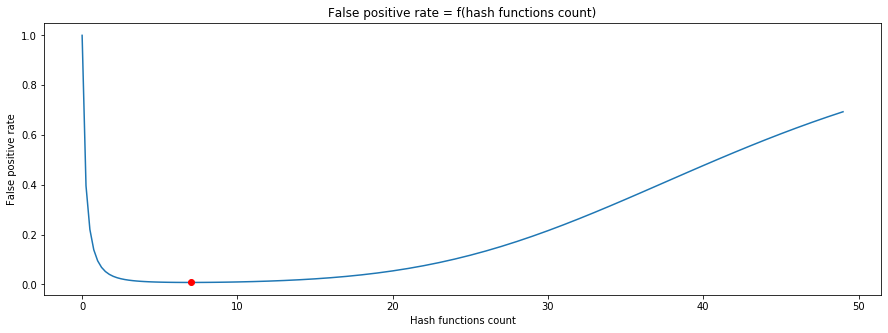

In [19]:
sample_nb_salt = [x / 4 for x in range(40)] + [x for x in range(10, 50)]
sample_false_positive_rate = [
    false_positive_rate(
        bit_array_size=BIT_ARRAY_SIZE, 
        nb_salt=nb_salt, 
        input_cardinal=INPUT_CARDINAL
    ) for nb_salt in sample_nb_salt]
plt.figure(figsize=(15,5))
plt.title("False positive rate = f(hash functions count)")
plt.xlabel("Hash functions count")
plt.ylabel("False positive rate")
plt.plot(sample_nb_salt, sample_false_positive_rate)
plt.plot(optimal_nb_salt, minimal_false_positive_rate, marker='o', color='r')
plt.show()

## 3. Minimal memory footprint
If you already know your input cardinality and the desired error rate you can aim for the minimal memory footprint Bloom filter by using the class method ```BloomFilter.minimal_memory_bloom_filter```

In [20]:
ERROR_RATE = 0.05

In [21]:
bloom_filter = BloomFilter.minimal_memory_bloom_filter(error_rate=ERROR_RATE,
                                                       input_cardinal=INPUT_CARDINAL)

2019-10-20 12:31:08,465 - bloom_filter.bloom_filter - INFO - False positive rate: 5.0%
2019-10-20 12:31:08,467 - bloom_filter.bloom_filter - INFO - Bloom filter parameters: bit-array size: 62353 number of hash functions: 4


Let's check how the memory footprint scales with input cardinality and false positive rate. 
  
__Input cardinality__

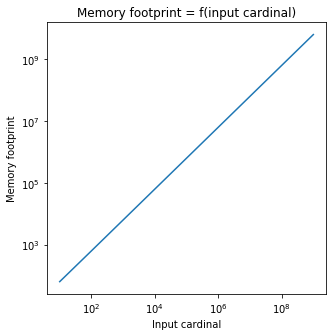

In [22]:
sample_input_cardial = [10**x for x in range(1, 10)]
sample_bit_array_size = [minimal_memory_footprint(input_cardinal=input_cardinal, 
                                                  error_rate=ERROR_RATE) \
                         for input_cardinal in sample_input_cardial]
plt.figure(figsize=(5,5))
plt.title("Memory footprint = f(input cardinal)")
plt.xlabel("Input cardinal")
plt.ylabel("Memory footprint")
plt.loglog(sample_input_cardial, sample_bit_array_size)
plt.show()

The bloom filter scales linearly with input cardinality ( O(input cardinality) ).  
  
__False positive rate__  

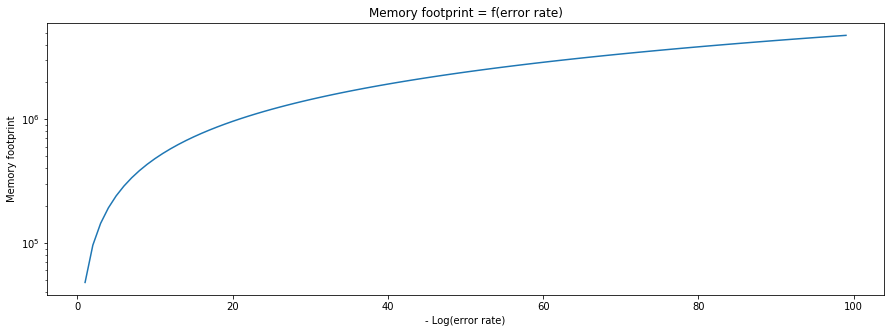

In [30]:
sample_log_error_rate = [x for x in range(1, 100)]
sample_bit_array_size = [minimal_memory_footprint(input_cardinal=INPUT_CARDINAL, 
                                                  error_rate=10**-log_error_rate) \
                         for log_error_rate in sample_log_error_rate]
plt.figure(figsize=(15,5))
plt.title("Memory footprint = f(error rate)")
plt.xlabel("- Log(error rate)")
plt.ylabel("Memory footprint")
plt.semilogy(sample_log_error_rate, sample_bit_array_size)
plt.show()

The bloom filter sacles logarithmicly with error rate ( O(log(error rate) ).